In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [23]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_data[0].shape)
print(train_labels[0].shape)

(28, 28)
()


In [4]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
len(train_labels), len(test_labels)

(60000, 10000)

In [7]:
import matplotlib.pyplot as plt

In [8]:
class_names = [
    "T-shirt/top",
    "Trouser/pants",
    "Pullover shirt",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
    ]

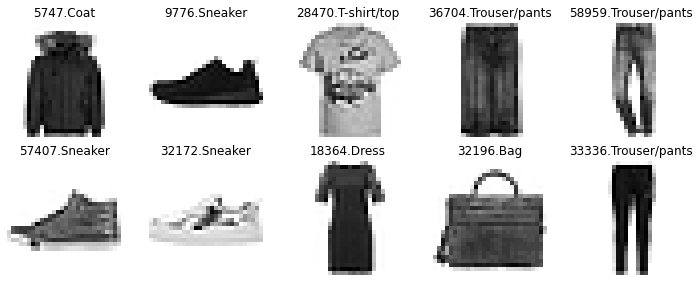

In [9]:
import random

fig, ax = plt.subplots(2, 5, figsize=(10, 4))
ax = ax.flatten()
for i in range(10):
    index = random.choice(range(len(train_data)))
    ax[i].imshow(train_data[index], cmap=plt.cm.binary)
    ax[i].set_title(f'{index}.{class_names[train_labels[index]]}')
    ax[i].axis(False)

plt.tight_layout()
plt.show()

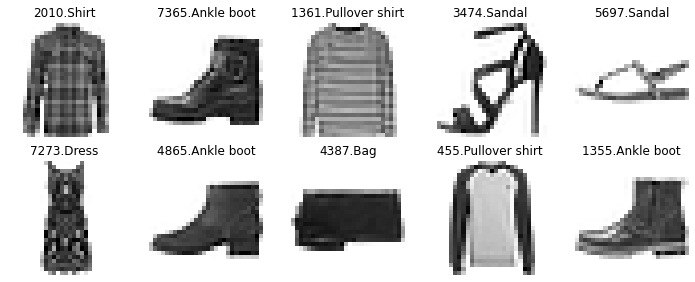

In [10]:
import random

fig, ax = plt.subplots(2, 5, figsize=(10, 4))
ax = ax.flatten()
for i in range(10):
    index = random.choice(range(len(test_data)))
    ax[i].imshow(test_data[index], cmap=plt.cm.binary)
    ax[i].set_title(f'{index}.{class_names[test_labels[index]]}')
    ax[i].axis(False)

plt.tight_layout()
plt.show()

In [11]:
print(f'Input shape : {train_data[0].shape[0]} x {train_data[0].shape[1]}')

Input shape : 28 x 28


In [12]:
print(f'Output shape : {len(class_names)}')

Output shape : 10


In [30]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # labels are Integers
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

hist = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1595 - accuracy: 0.1630 - val_loss: 1.8121 - val_accuracy: 0.2138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7001 - accuracy: 0.2530 - val_loss: 1.6497 - val_accuracy: 0.2853
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6252 - accuracy: 0.2843 - val_loss: 1.6026 - val_accuracy: 0.2916
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6016 - accuracy: 0.2903 - val_loss: 1.5929 - val_accuracy: 0.3068
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5829 - accuracy: 0.3030 - val_loss: 1.5754 - val_accuracy: 0.3154
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5676 - accuracy: 0.3153 - val_loss: 1.5407 - val_accuracy: 0.3322
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5244 - accuracy: 0.3510 - val_loss: 1.4987 - val_accuracy:

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [27]:
train_data.min(), train_data.max(), test_data.min(), test_data.max()

(0, 255, 0, 255)

In [28]:
# Normalization ( 0 - 1)

train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [29]:
train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [41]:
tf.random.set_seed(42)

model_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_norm.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # labels are Integers
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

hist_norm = model_norm.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [42]:
import pandas as pd

<AxesSubplot:>

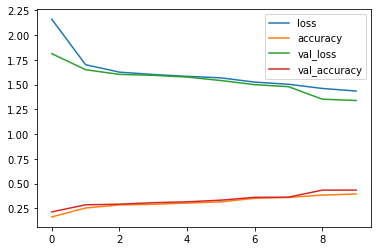

In [43]:
pd.DataFrame(hist.history).plot()

<AxesSubplot:>

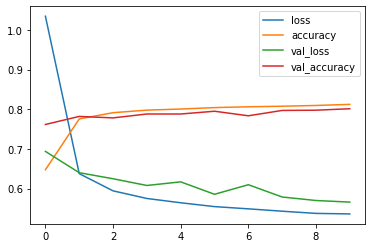

In [44]:
pd.DataFrame(hist_norm.history).plot()